# Linear Regression
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression ($L_2$-norm penalty) and lasso ($L_1$-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

## 1. Importación de paquetes y dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

df = pd.read_csv("./data/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## 2. EDA y Visual EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

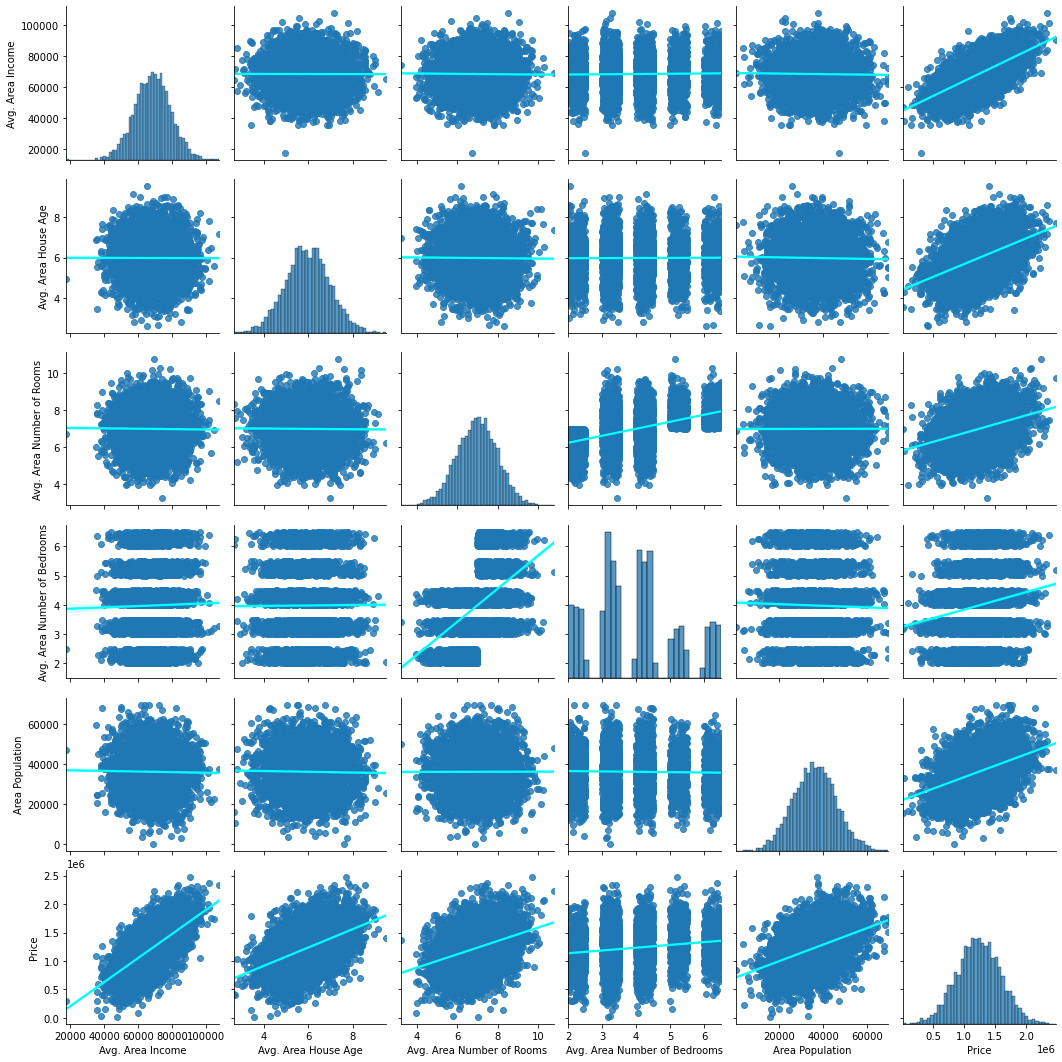

In [6]:
sns.pairplot(df, kind='reg',plot_kws={'line_kws':{'color':'cyan'}})

<AxesSubplot:ylabel='Frequency'>

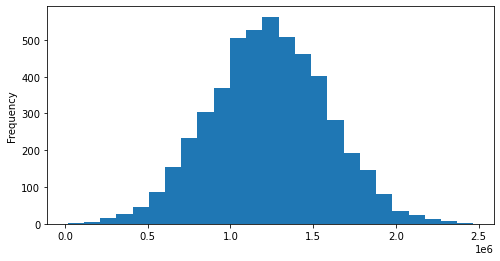

In [7]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

<AxesSubplot:ylabel='Density'>

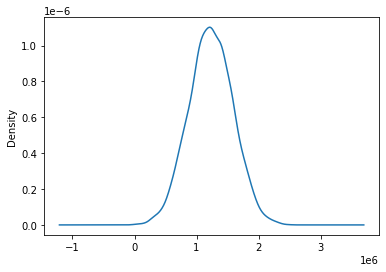

In [8]:
df['Price'].plot.density()

In [9]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

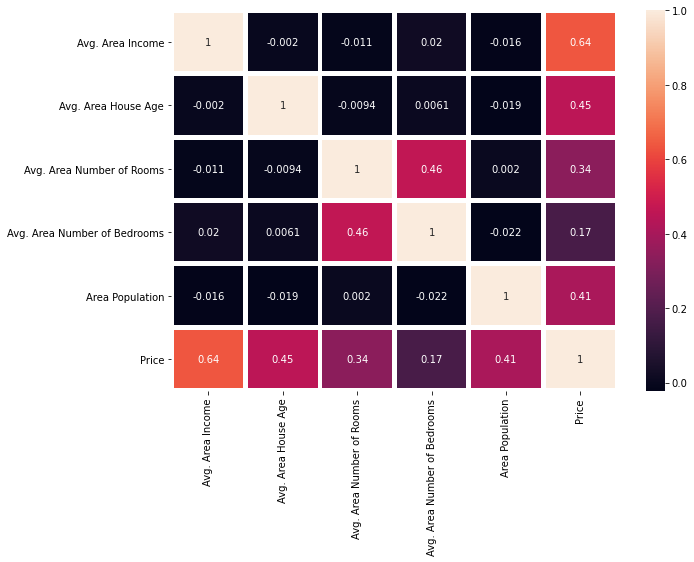

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=4)

## 3. División del dataset

Ponemos todas las características numéricas en X y el precio en y. Se ignora Address para regresiones lineales ya que es una cadena.

In [11]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column


['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

In [12]:
l_column[0:len_feature-2]

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

In [13]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 5)
Variable set size: (5000,)


In [14]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [15]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

Dividimos el dataset en 4 grupos:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Verificamos las divisiones train/test (deben estar en la proporción según el parámetro test_size anterior)

In [17]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


## 4. Creación del modelo

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## 5. Entrenamiento

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -2631028.9017456085


In [21]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [22]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


## 6. Predicción

In [23]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


In [24]:
y_test

2648    8.001462e+05
2456    7.073451e+05
4557    1.218264e+06
4884    1.233484e+06
92      5.856086e+05
            ...     
3014    9.547329e+05
734     1.039915e+06
452     1.629098e+06
2558    6.068631e+05
1927    9.264825e+05
Name: Price, Length: 1500, dtype: float64

In [37]:
predictions

array([179.59311435, 167.45946696, 169.11405524, 180.28252614,
       168.01099638, 171.73382002, 180.14464378, 178.21429079,
       178.62793786, 177.66276136, 175.31876129, 176.5597025 ,
       169.25193759, 176.00817308, 181.66134971, 170.49287881,
       171.04440823, 172.28534944, 178.07640843, 169.66558466,
       172.28534944, 175.18087894, 177.24911429, 181.38558499,
       174.62934951, 172.28534944, 171.59593766, 176.97334958,
       176.14605543, 172.56111416, 171.87170237, 176.00817308,
       168.42464345, 173.3884083 , 174.76723187, 177.38699665,
       177.24911429, 172.83687887, 172.14746709, 173.11264358,
       176.83546722, 174.07782008, 181.93711442, 179.73099671,
       179.86887907, 177.524879  , 175.45664365, 183.86746741,
       175.18087894, 181.10982028, 177.93852607, 174.76723187,
       171.18229059, 174.07782008, 180.97193792, 180.83405557,
       176.97334958, 173.11264358, 176.83546722, 174.90511422,
       177.524879  , 184.97052627, 172.69899651, 181.10

Gráfico de puntos del precio predicho y el y_test

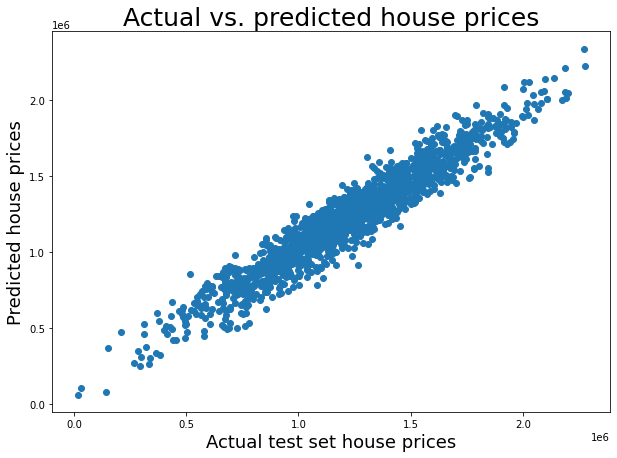

In [25]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)


## 7. Cálculo de errores

In [26]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

Mean absolute error (MAE): 81739.77482718202
Mean square error (MSE): 10489638335.805088
Root mean square error (RMSE): 102418.9354358123
R-squared value of predictions: 0.919


### *Ejercicio: Alturas*

Con el dataset heights.csv (altura de padres e hijos):

1. Crea un dataframe de pandas con la información del dataset.

In [27]:
import pandas as pd
df = pd.read_csv('data/heights.csv')
df

,Father,Son
0,165.100,151.892
1,160.782,160.528
2,165.100,160.782
3,167.132,159.512
4,155.194,163.322
...,...,...
1073,170.180,179.832
1074,181.102,173.482
1075,182.372,176.022
1076,179.578,176.022


2. Muestra la información del dataset y un gráfico que relacione ambos datos.

In [28]:
df.describe()

,Father,Son
count,1078.000000,1078.000000
mean,171.924542,174.457944
std,6.974401,7.153133
min,149.860000,148.590000
25%,167.132000,169.926000
50%,172.212000,174.244000
75%,176.784000,179.070000
max,191.516000,199.136000


<AxesSubplot:xlabel='Father', ylabel='Son'>

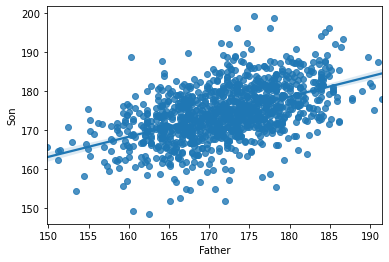

In [29]:
import seaborn as sns
sns.regplot(x=df['Father'],y=df['Son'])


3. Separa el dataframe en 4 grupos: X_train (característica de entrenamiento: altura de los padres), X_test (característica de test, 30% de las filas), y_train(etiqueta de entrenamiento: altura de los hijos), y_test(etiqueta de test).

In [30]:
from sklearn.model_selection import train_test_split
X = df[['Father']]
y = df['Son']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

4. Muestra el número de registros de cada grupo (entrenamiento y test)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(754, 1)
(324, 1)
(754,)
(324,)


5. Entrena un modelo de regresión lineal con sklearn y muestra los coeficientes (constante y pendiente).

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression();

lr.fit(X_train, y_train)

LinearRegression()

6. Muestra un gráfico con los puntos y la recta de regresión.

In [33]:
print("The intercept term of the linear model:", lr.intercept_)
print("The coefficients of the linear model:", lr.coef_)

The intercept term of the linear model: 81.28299396000654
The coefficients of the linear model: [0.54284392]


7. Muestra las métricas de los datos de entrenamiento.

In [34]:
from sklearn import metrics
predictions = lr.predict(X_train)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_train,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_train,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_train,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_train,predictions),3))

Mean absolute error (MAE): 4.970530771558217
Mean square error (MSE): 40.41310832134696
Root mean square error (RMSE): 6.357130510013693
R-squared value of predictions: 0.255


8. Calcula las predicciones de los datos de test y muestra los valores de las diferentes métricas.

In [35]:
from sklearn import metrics
predictions = lr.predict(X_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

lr.predict([[168]])

Mean absolute error (MAE): 4.444214142653832
Mean square error (MSE): 33.529772558115184
Root mean square error (RMSE): 5.790489837493473
R-squared value of predictions: 0.234


array([172.48077326])

## Extra

Consulta la libreria [MLR](https://mlr.readthedocs.io/en/latest/) y demuestra su uso:.

In [36]:
from mlr.MLR import MyLinearRegression as mlr
m = mlr()

ModuleNotFoundError: No module named 'mlr'

# Webgrafia


[Curso de Cesar Guirò](https://cesguiro.es/doku.php?id=clase:ia:saa:start)
[Curso de Luz Frías](https://github.com/koldLight/curso-python-analisis-datos)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
[DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.